<a href="https://colab.research.google.com/github/ilansarbac95/cyber-risk-dashboard/blob/main/cyber_risk_dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()


Saving companies_scored.csv to companies_scored.csv


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lecture du fichier
df = pd.read_csv('companies_scored.csv')

# Affichage des premières lignes
df.head()


,company,sector,revenue,num_of_employees,MFA_Enabled,Security_Training,Cloud_Usage,Past_Cyber_Incident,Taille_Entreprise,MFA_Score,Training_Score,Cloud_Score,Incident_Score,Risk_Score,Estimated_Cyber_Insurance_Cost,Risk_Level
0,Walmart,Retailing,572754.0,2300000.0,Yes,Yes,High,No,Grande,1,1,0,1,75.0,1500.0,Low
1,Amazon,Retailing,469822.0,1608000.0,No,No,High,No,Grande,0,0,0,1,25.0,2500.0,High
2,Apple,Technology,365817.0,154000.0,No,No,Low,No,Grande,0,0,0,1,25.0,2500.0,High
3,CVS;Health,Health;Care,292111.0,258000.0,Yes,No,High,No,Grande,1,0,0,1,50.0,2000.0,Medium
4,UnitedHealth;Group,Health;Care,287597.0,350000.0,Yes,No,High,No,Grande,1,0,0,1,50.0,2000.0,Medium


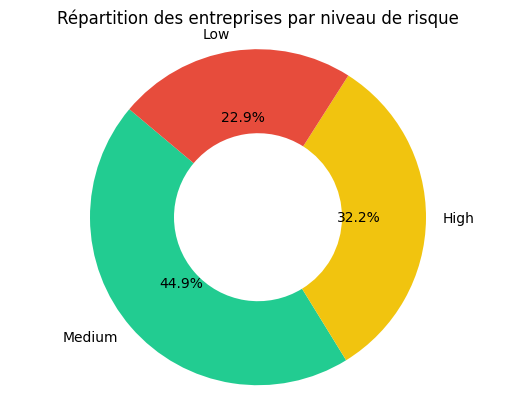

In [5]:
risk_counts = df['Risk_Level'].value_counts()
colors = ['#22cc91', '#f1c40f', '#e74c3c']  # Vert, jaune, rouge

plt.pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%', startangle=140,
        colors=colors, wedgeprops=dict(width=0.5))
plt.title("Répartition des entreprises par niveau de risque")
plt.axis('equal')
plt.show()


/tmp/ipython-input-245569712.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Risk_Level', y='Estimated_Cyber_Insurance_Cost', data=df, palette='Set2')


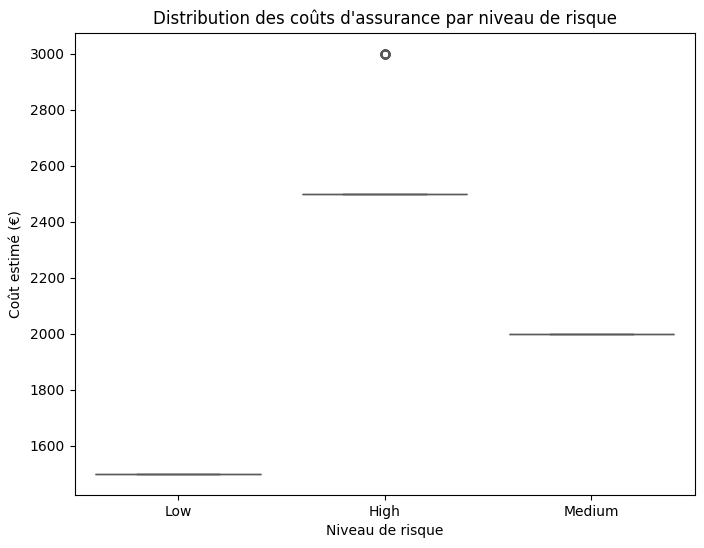

In [6]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Risk_Level', y='Estimated_Cyber_Insurance_Cost', data=df, palette='Set2')
plt.title("Distribution des coûts d'assurance par niveau de risque")
plt.xlabel("Niveau de risque")
plt.ylabel("Coût estimé (€)")
plt.show()


/tmp/ipython-input-3636610948.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sector_risks.values, y=sector_risks.index, palette='coolwarm')


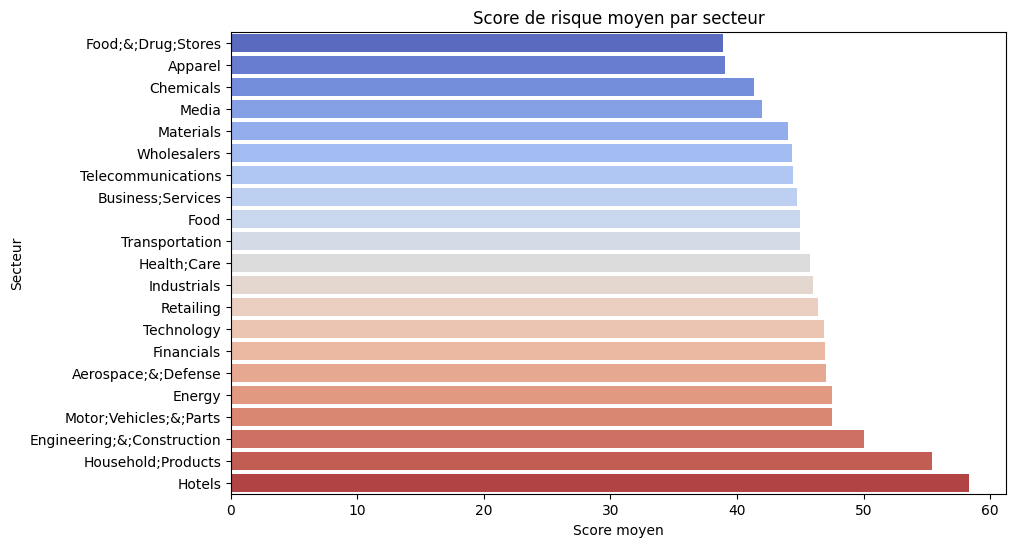

In [7]:
plt.figure(figsize=(10, 6))
sector_risks = df.groupby('sector')['Risk_Score'].mean().sort_values()
sns.barplot(x=sector_risks.values, y=sector_risks.index, palette='coolwarm')
plt.title("Score de risque moyen par secteur")
plt.xlabel("Score moyen")
plt.ylabel("Secteur")
plt.show()


/tmp/ipython-input-3056640629.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=size_risks.values, y=size_risks.index, palette='viridis')


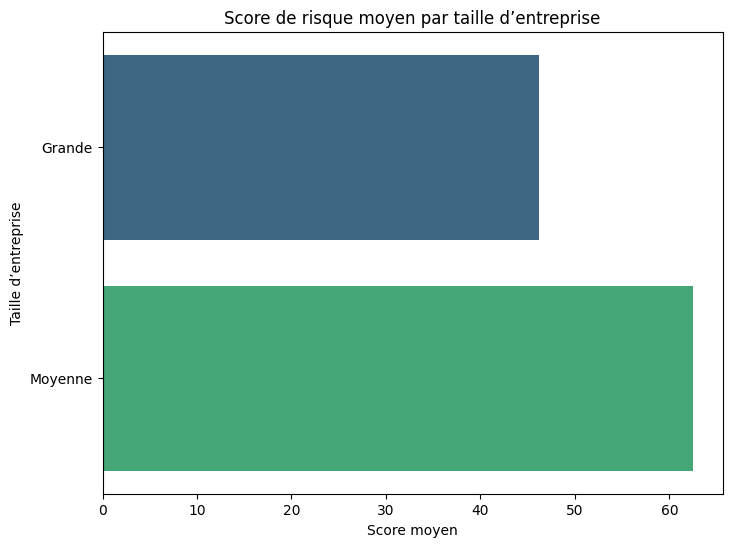

In [8]:
plt.figure(figsize=(8, 6))
size_risks = df.groupby('Taille_Entreprise')['Risk_Score'].mean().sort_values()
sns.barplot(x=size_risks.values, y=size_risks.index, palette='viridis')
plt.title("Score de risque moyen par taille d’entreprise")
plt.xlabel("Score moyen")
plt.ylabel("Taille d’entreprise")
plt.show()


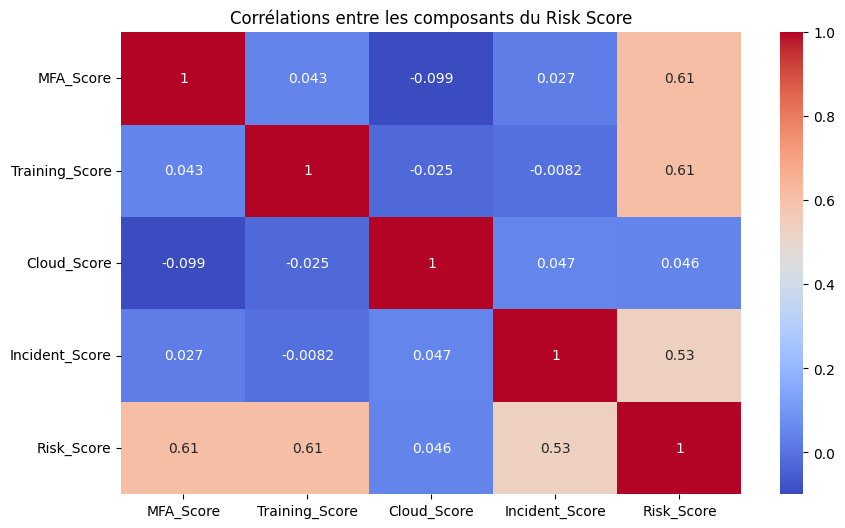

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['MFA_Score', 'Training_Score', 'Cloud_Score', 'Incident_Score', 'Risk_Score']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Corrélations entre les composants du Risk Score")
plt.show()


In [10]:
df[['company', 'Risk_Score', 'Risk_Level']].sort_values(by='Risk_Score', ascending=False).head(10)


,company,Risk_Score,Risk_Level
932,Aerojet;Rocketdyne;Holdings,75.0,Low
929,Amedisys,75.0,Low
21,Ford;Motor,75.0,Low
19,Elevance;Health,75.0,Low
16,Home;Depot,75.0,Low
620,Illumina,75.0,Low
616,Penn;Mutual;Life;Insurance,75.0,Low
644,Conduent,75.0,Low
32,Fannie;Mae,75.0,Low
28,Phillips;66,75.0,Low


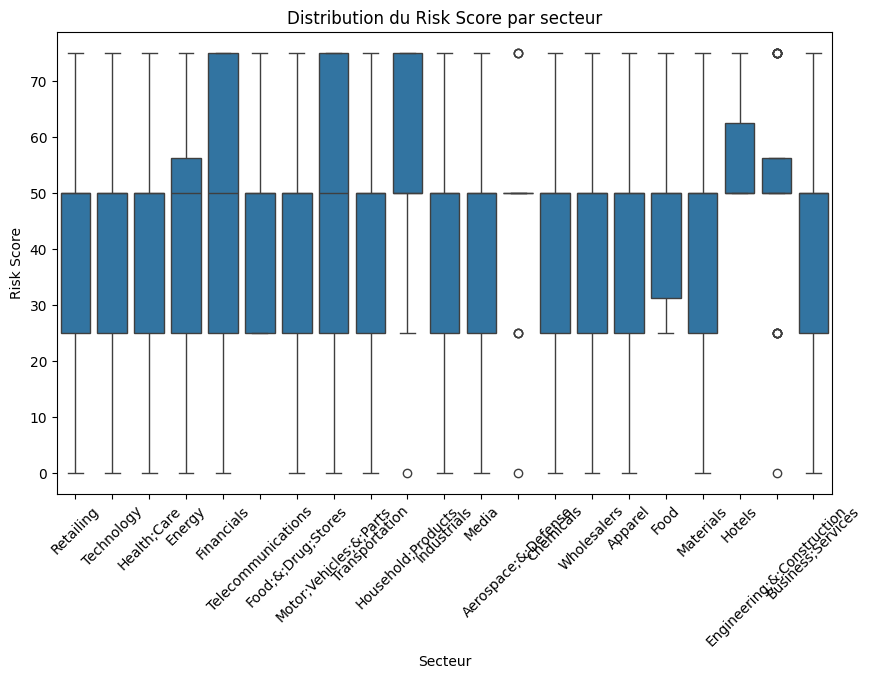

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sector', y='Risk_Score', data=df)
plt.xticks(rotation=45)
plt.title("Distribution du Risk Score par secteur")
plt.xlabel("Secteur")
plt.ylabel("Risk Score")
plt.show()


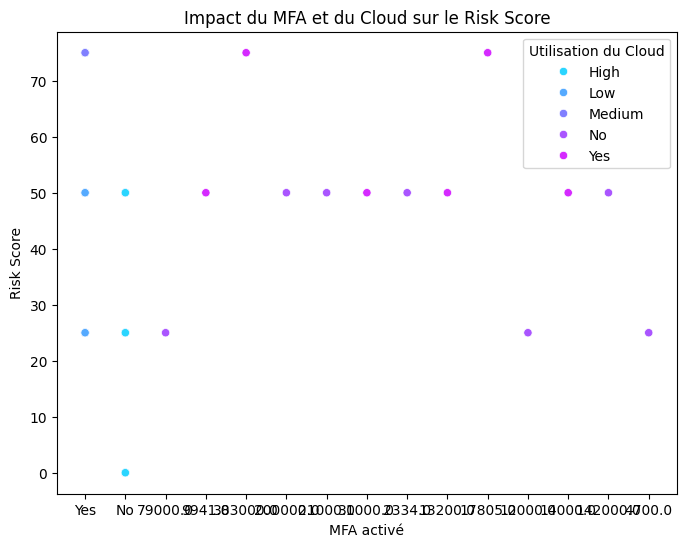

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MFA_Enabled', y='Risk_Score', data=df, hue='Cloud_Usage', palette='cool')
plt.title("Impact du MFA et du Cloud sur le Risk Score")
plt.xlabel("MFA activé")
plt.ylabel("Risk Score")
plt.legend(title="Utilisation du Cloud")
plt.show()


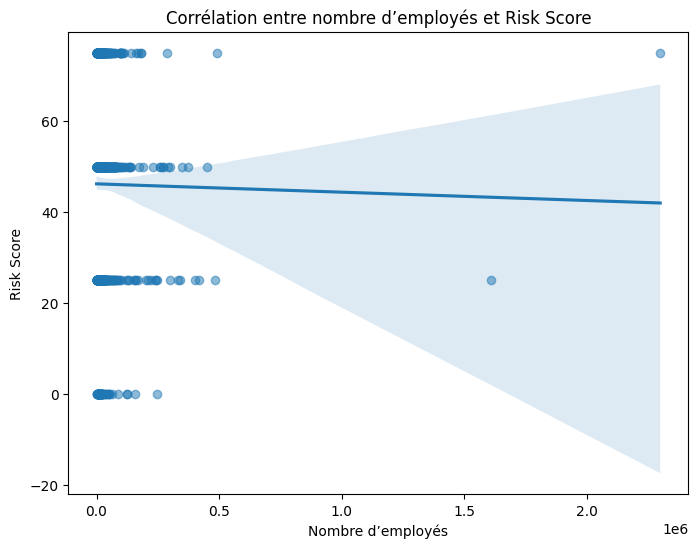

In [13]:
plt.figure(figsize=(8, 6))
sns.regplot(x='num_of_employees', y='Risk_Score', data=df, scatter_kws={'alpha':0.5})
plt.title("Corrélation entre nombre d’employés et Risk Score")
plt.xlabel("Nombre d’employés")
plt.ylabel("Risk Score")
plt.show()


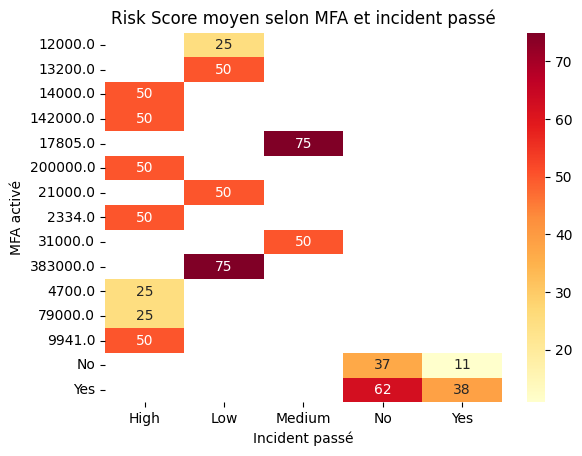

In [14]:
crosstab = pd.crosstab(df['MFA_Enabled'], df['Past_Cyber_Incident'], values=df['Risk_Score'], aggfunc='mean')
sns.heatmap(crosstab, annot=True, cmap='YlOrRd')
plt.title("Risk Score moyen selon MFA et incident passé")
plt.xlabel("Incident passé")
plt.ylabel("MFA activé")
plt.show()


/tmp/ipython-input-4080854010.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


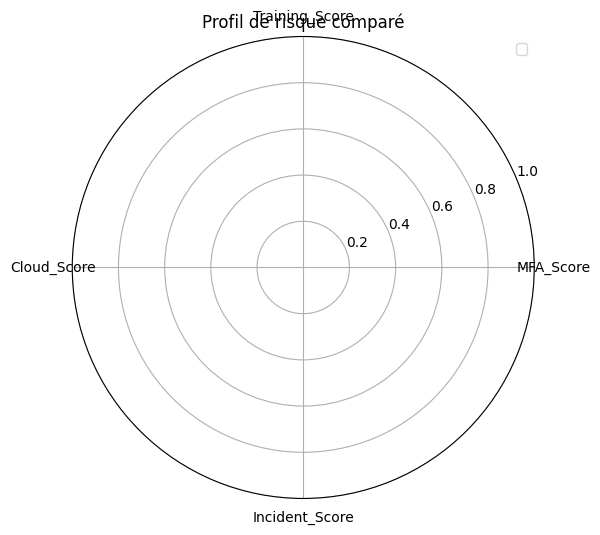

In [15]:
# Exemple avec 2 entreprises (tu peux changer les noms)
entreprises = df[df['company'].isin(['Company A', 'Company B'])]

# Radar chart
import numpy as np
import matplotlib.pyplot as plt

labels = ['MFA_Score', 'Training_Score', 'Cloud_Score', 'Incident_Score']
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for i, row in entreprises.iterrows():
    values = [row[label] for label in labels]
    values += values[:1]
    ax.plot(angles, values, label=row['company'])
    ax.fill(angles, values, alpha=0.25)

ax.set_title("Profil de risque comparé")
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.legend(loc='upper right')
plt.show()
